In [1]:
import pickle

result = {}
with open("result_pickle", 'rb') as f:
    result = pickle.load(f)


In [2]:
original = []
for i in range(30):
    name = "0.0_0.0_0.0_" + str(i)
    #name = "0.15_0.0_0.0_" + str(i)
    #name = "0.0_0.2_0.0_" + str(i)
    #name = "0.0_0.0_0.1_" + str(i)
    original.append(result[name][1][-1])

print(sum(original)/30)

0.9633333333333328


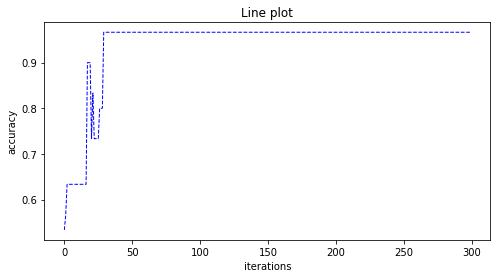

In [3]:
import matplotlib.pyplot as plt
name = "0.0_0.0_0.0_9"
x = []
y = []
for i in range(300):
    x.append(i)
    y.append(result[name][1][i])
    
plt.figure(figsize=(8,4))
plt.plot(x,y,"b--",linewidth=1)
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.title("Line plot")
# plt.savefig("scale_original_sum.jpg")
plt.show()

In [4]:
ori = []
for i in range(30):
    name = "0.0_0.0_0.0_" + str(i)
    ori.append(result[name][1][-1])
print(sum(ori)/30)
    
conn = []
for i in range(30):
    name = "0.05_0.0_0.0_" + str(i)
    conn.append(result[name][1][-1])
print(sum(conn)/30)
    
deep = []
for i in range(30):
    name = "0.0_0.15_0.0_" + str(i)
    deep.append(result[name][1][-1])
print(sum(deep)/30)
    
cluster = []
for i in range(30):
    name = "0.0_0.0_0.15_" + str(i)
    cluster.append(result[name][1][-1])
print(sum(cluster)/30)

0.9633333333333328
0.9588888888888882
0.9622222222222215
0.9588888888888882


In [5]:
from scipy import stats
print(stats.kruskal(ori, conn))
print(stats.kruskal(ori, deep))
print(stats.kruskal(ori, cluster))

KruskalResult(statistic=0.13612551618172797, pvalue=0.7121635656983392)
KruskalResult(statistic=0.11112552552548853, pvalue=0.7388663616769029)
KruskalResult(statistic=1.966823460628768, pvalue=0.16078543775058007)


In [6]:
# import matplotlib.pyplot as plt
# name = "0.2_0.0_0.0_15"
# x = []
# y = []
# for i in range(300):
#     x.append(i)
#     y.append(result[name][1][i])
    
# plt.figure(figsize=(8,4))
# plt.plot(x,y,"b--",linewidth=1)
# plt.xlabel("iterations")
# plt.ylabel("accuracy")
# plt.title("Line plot")
# # plt.savefig("scale_original_sum.jpg")
# plt.show()

# # print(result[name][2])

In [7]:
def take_connection(x):
    x = result[name][2]
    li = x.split(':')
    li = li[4]
    a = li.split('(')

    i = 2
    connections = []
    while(i <= len(a)):
        t = a[i].split(',')
        node_in = int(t[0])
        node_out = int(t[1].split(')')[0])
        connections.append((node_in, node_out))
        i += 2
    
    return connections

def feature_selection(connections, n_input, n_output):
    s_input = set()
    for i in range(n_input):
        s_input.add(-i -1)
    s_output = set()
    for i in range(n_output):
        s_output.add(i)
    
    useful = s_output
    last = -1
    while(last != len(useful)):
        last = len(useful)
        for i in connections:
            if(i[1] in useful):
                useful.add(i[0])
    
    return list(useful & s_input)

In [9]:
for i in range(30):
    name = "0.05_0.0_0.0_" + str(i)
    con = take_connection(result[name][2])
    new_feature = feature_selection(con, 4, 3)
    print(new_feature)

[-4, -3, -1, -2]
[-4, -2]
[-3, -1, -2]
[-4, -3, -1, -2]
[-4, -3, -2]
[-4, -3, -2]
[-4, -3, -2]
[-4, -3, -1, -2]
[-4, -3, -2]
[-4, -3, -1, -2]
[-4, -3, -2]
[-4, -3, -2]
[-4, -3, -2]
[-4, -3, -2]
[-4, -2]
[-4, -3, -2]
[-3, -1]
[-4, -3, -2]
[-4, -3]
[-4, -3, -2]
[-4, -3, -1, -2]
[-4, -3, -1, -2]
[-4, -3, -2]
[-4, -3, -2]
[-4, -3, -1]
[-4, -3, -1, -2]
[-4, -3, -2]
[-4, -2]
[-4, -3, -1, -2]
[-4, -3, -2]


In [22]:
# !!!!!!!!!!!!!!!!!!!!!!!!! change number
name = "0.05_0.0_0.0_18"
con = take_connection(result[name][2])
new_feature = feature_selection(con, 4, 3)
print(new_feature)

[-4, -3]


In [23]:
with open("train_feature_pickle", 'rb') as f:
    train_feature = pickle.load(f)
with open("train_target_pickle", 'rb') as f:
    train_target = pickle.load(f)
with open("test_feature_pickle", 'rb') as f:
    test_feature = pickle.load(f)
with open("test_target_pickle", 'rb') as f:
    test_target = pickle.load(f)

In [24]:
def max_index(li):
    length = len(li)
    index = 0
    max_num = 0
    for i in range(length-1):
        if(li[i] > max_num):
            index = i
            max_num = li[i]
    return index

In [25]:
# multi-calssification
def auto_evaluate(predict, target):
    count = 0
    for i,j in zip(predict, target):
        if max_index(i) == max_index(j):
            count += 1
    
    return count/len(target)


# # binary classification
# def auto_evaluate(predict, target):
#     count = 0
#     for i,j in zip(predict, target):
#         if(i == j):
#             count += 1
    
#     return count/len(target)

In [26]:
# select feature
new_train = []
new_test = []
for line in train_feature:
    x = []
    for i in new_feature:
        x.append(line[-i -1])
    new_train.append(x)

for line in test_feature:
    x = []
    for i in new_feature:
        x.append(line[-i -1])
    new_test.append(x)


In [27]:
print(len(new_train[0]))

2


In [28]:
import time
import random
from sklearn.neural_network import MLPClassifier

In [29]:
X = train_feature
y = train_target
result1 = []

tic = time.time()
for i in range(100):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(9, 9), random_state=i, max_iter=9999)
    clf.fit(X, y)
    pred = clf.predict(test_feature)
    result1.append(auto_evaluate(pred, test_target))
toc = time.time()
print(toc - tic)

5.365009069442749


In [30]:
print(result1)
print(sum(result1)/len(result1))

[0.9333333333333333, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 0.6, 0.9666666666666667, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 0.8666666666666667, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5666666666666667, 0.6333333333333333, 0.5666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 0.7666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0.9663333333333334


In [31]:
X = new_train
y = train_target
result2 = []

tic = time.time()
for i in range(100):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(9, 9), random_state=i, max_iter=9999)
    clf.fit(X, y)
    pred = clf.predict(new_test)
    result2.append(auto_evaluate(pred, test_target))
toc = time.time()
print(toc - tic)

4.9677369594573975


In [32]:
print(result2)
print(sum(result2)/len(result2))

[1.0, 1.0, 1.0, 0.8666666666666667, 1.0, 0.8, 1.0, 0.9333333333333333, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.8666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7666666666666667, 0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7666666666666667, 0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5666666666666667, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 0.6, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0.971
